# Fertilizer Prediction

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d gdabhishek/fertilizer-prediction

Dataset URL: https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction
License(s): unknown
  0%|                                               | 0.00/1.27k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 1.27k/1.27k [00:00<00:00, 6.14MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Fertilizer Prediction/fertilizer-prediction.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Fertilizer Prediction')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Fertilizer Prediction.csv')

In [5]:
df.head(5)

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [6]:
df.shape

(99, 9)

In [7]:
df.size

891

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temparature,99.0,30.282828,3.502304,25.0,28.0,30.0,33.0,38.0
Humidity,99.0,59.151515,5.840331,50.0,54.0,60.0,64.0,72.0
Moisture,99.0,43.181818,11.271568,25.0,34.0,41.0,50.5,65.0
Nitrogen,99.0,18.909091,11.599693,4.0,10.0,13.0,24.0,42.0
Potassium,99.0,3.383838,5.814667,0.0,0.0,0.0,7.5,19.0
Phosphorous,99.0,18.606061,13.476978,0.0,9.0,19.0,30.0,42.0


In [10]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Temparature        14
Humidity           13
Moisture           41
Soil Type           5
Crop Type          11
Nitrogen           24
Potassium          13
Phosphorous        32
Fertilizer Name     7
dtype: int64

In [13]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [14]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

## Data Visualizatioon

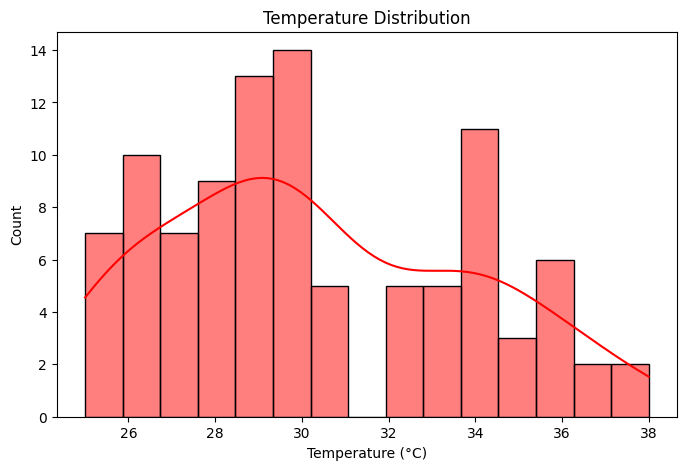

In [24]:
# Histogram – Temperature Distribution

plt.figure(figsize=(8, 5))
sns.histplot(df['Temparature'], bins=15, kde=True, color='red')
plt.xlabel('Temperature (°C)')
plt.title('Temperature Distribution')
plt.show()

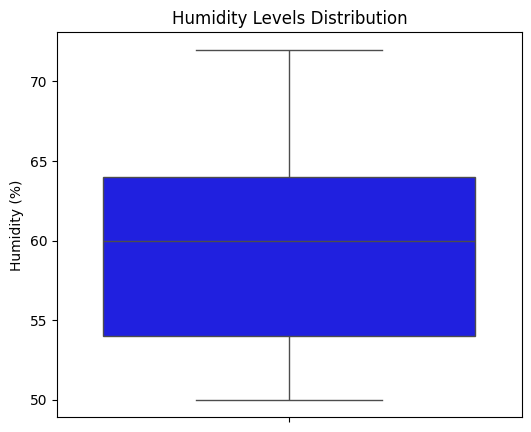

In [28]:
# Box Plot – Humidity Levels

plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Humidity '], color='blue')
plt.title('Humidity Levels Distribution')
plt.ylabel('Humidity (%)')
plt.show()

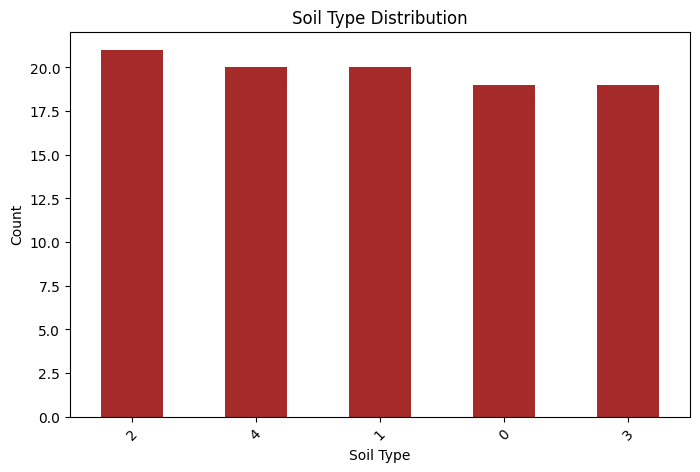

In [29]:
# Bar Chart – Soil Type Count

plt.figure(figsize=(8, 5))
df['Soil Type'].value_counts().plot(kind='bar', color='brown')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.title('Soil Type Distribution')
plt.xticks(rotation=45)
plt.show()

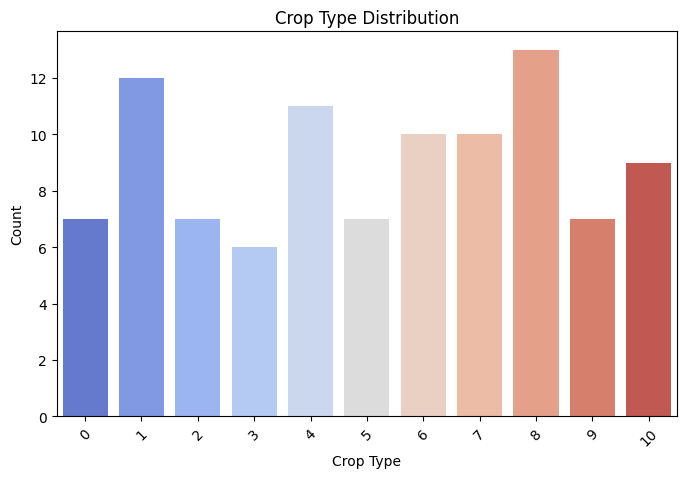

In [30]:
# Count Plot – Crop Type

plt.figure(figsize=(8, 5))
sns.countplot(x=df['Crop Type'], palette='coolwarm')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.title('Crop Type Distribution')
plt.xticks(rotation=45)
plt.show()

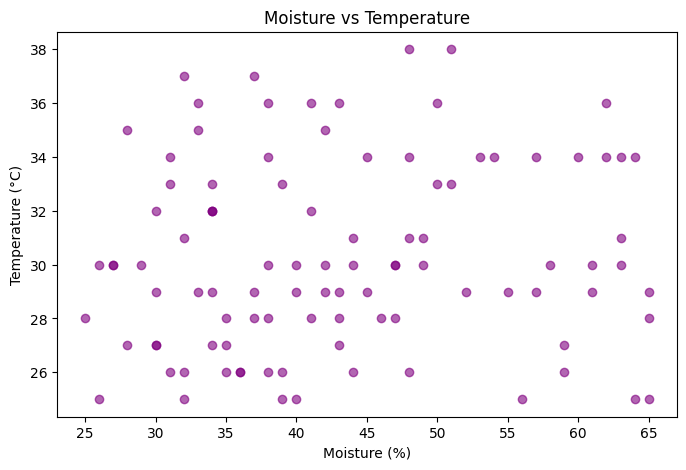

In [31]:
# Scatter Plot – Moisture vs Temperature

plt.figure(figsize=(8, 5))
plt.scatter(df['Moisture'], df['Temparature'], color='purple', alpha=0.6)
plt.xlabel('Moisture (%)')
plt.ylabel('Temperature (°C)')
plt.title('Moisture vs Temperature')
plt.show()

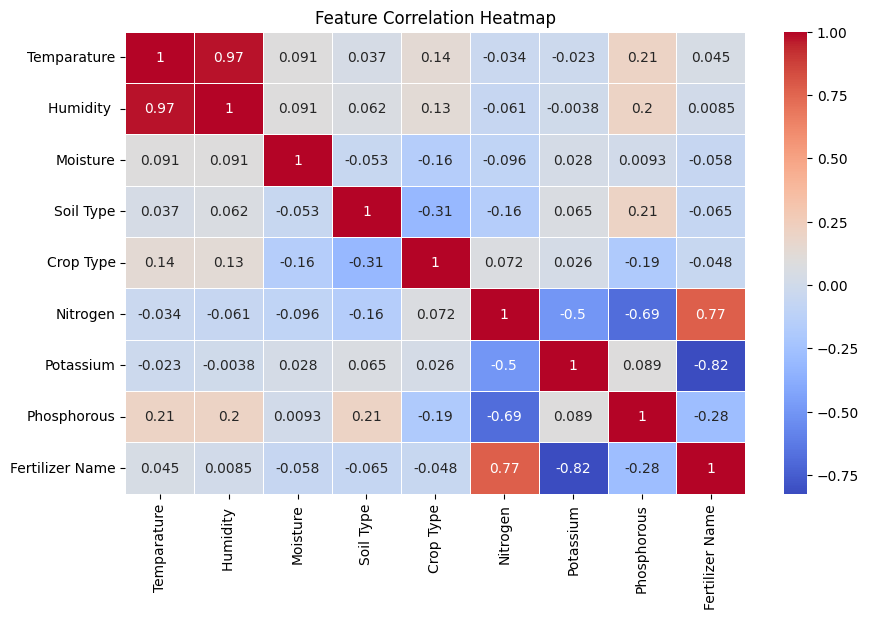

In [32]:
# Heatmap – Correlation Between Nutrients & Climate Features

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

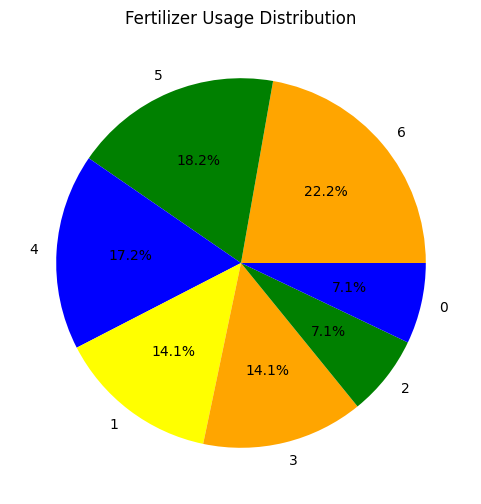

In [33]:
# Pie Chart – Fertilizer Usage Distribution

plt.figure(figsize=(6, 6))
df['Fertilizer Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'green', 'blue', 'yellow'])
plt.title('Fertilizer Usage Distribution')
plt.ylabel('')
plt.show()

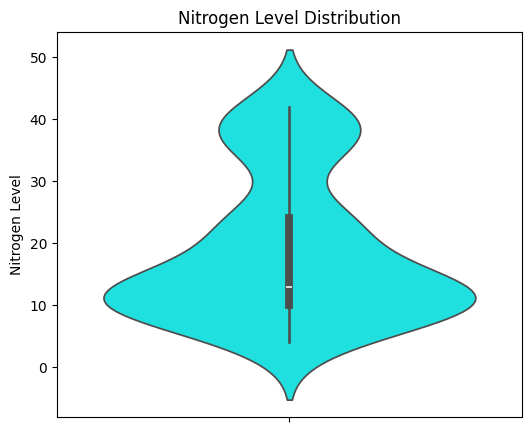

In [34]:
# Violin Plot – Nitrogen Levels

plt.figure(figsize=(6, 5))
sns.violinplot(y=df['Nitrogen'], color='cyan')
plt.title('Nitrogen Level Distribution')
plt.ylabel('Nitrogen Level')
plt.show()

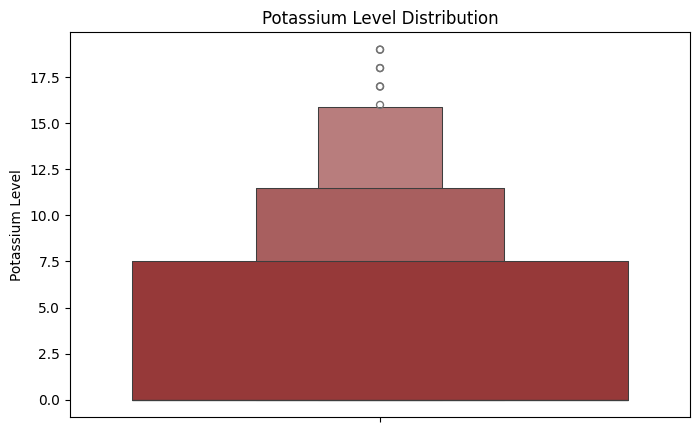

In [35]:
# Boxen Plot – Potassium Levels

plt.figure(figsize=(8, 5))
sns.boxenplot(y=df['Potassium'], color='brown')
plt.title('Potassium Level Distribution')
plt.ylabel('Potassium Level')
plt.show()

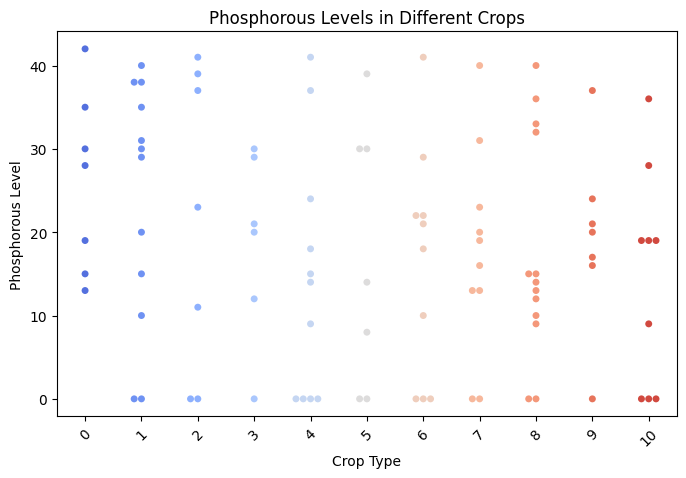

In [36]:
# Swarm Plot – Phosphorous vs Crop Type

plt.figure(figsize=(8, 5))
sns.swarmplot(x=df['Crop Type'], y=df['Phosphorous'], palette='coolwarm')
plt.xlabel('Crop Type')
plt.ylabel('Phosphorous Level')
plt.title('Phosphorous Levels in Different Crops')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [16]:
# label encoding categorical data

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Fertilizer Name'] = le.fit_transform(df['Fertilizer Name'])
df['Soil Type'] = le.fit_transform(df['Soil Type'])
df['Crop Type'] = le.fit_transform(df['Crop Type'])

In [17]:
X = df.drop('Fertilizer Name', axis=1)
y = df['Fertilizer Name']

In [18]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [19]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [20]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [21]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[1.0, 0.65, 1.0, 0.95, 0.35, 0.95, 1.0, 1.0, 0.9]


## Model Evaluation

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


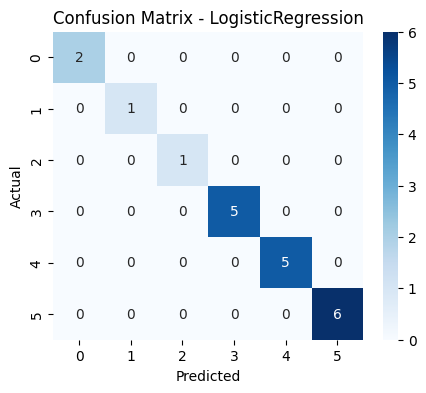

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         1
           4       1.00      0.20      0.33         5
           5       0.62      1.00      0.77         5
           6       0.75      1.00      0.86         6

    accuracy                           0.65        20
   macro avg       0.56      0.53      0.49        20
weighted avg       0.68      0.65      0.58        20

Confusion Matrix:
 [[0 2 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 1 2 2]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


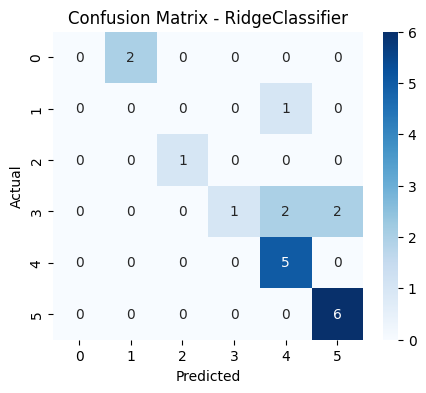

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


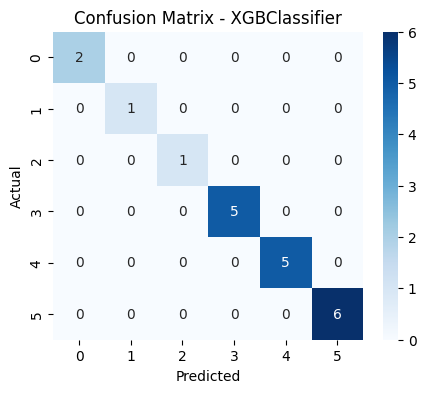

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


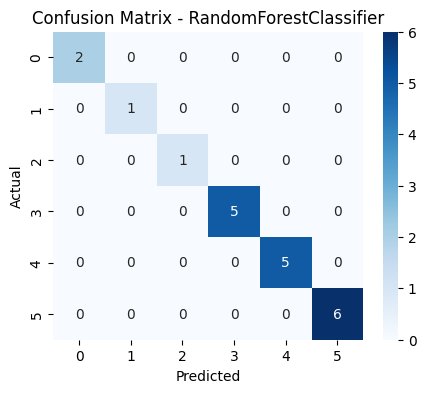

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.11      1.00      0.20         1
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.35        20
   macro avg       0.16      0.29      0.17        20
weighted avg       0.31      0.35      0.31        20

Confusion Matrix:
 [[0 2 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 5 0 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 0 0 0 0 6]]


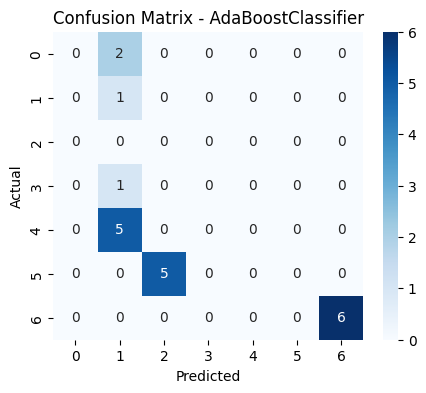

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.50      1.00      0.67         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.92      0.97      0.93        20
weighted avg       0.97      0.95      0.96        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 1 0 0 4 0]
 [0 0 0 0 0 6]]


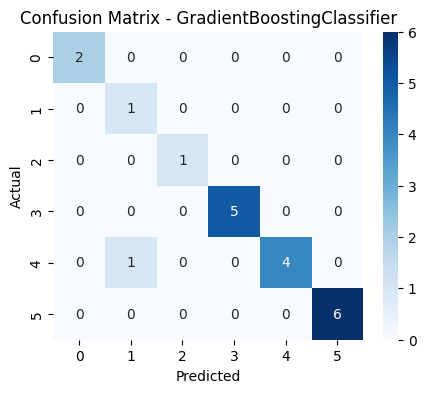

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


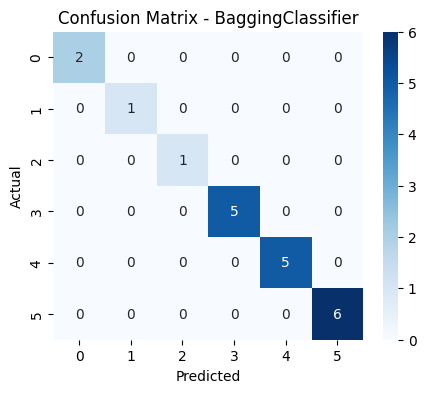

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

Confusion Matrix:
 [[2 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


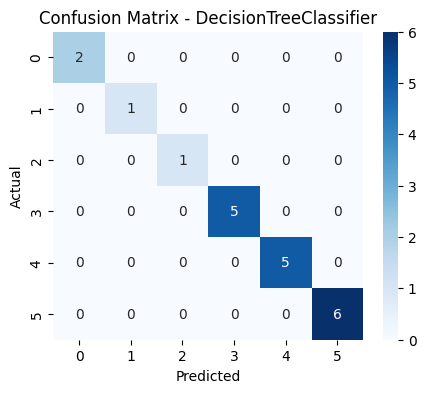

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.72      0.83      0.75        20
weighted avg       0.87      0.90      0.88        20

Confusion Matrix:
 [[0 2 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 5 0]
 [0 0 0 0 0 6]]


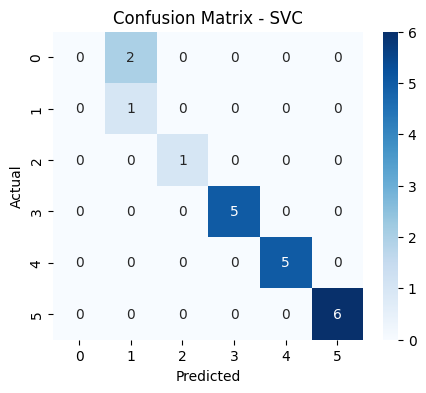

In [23]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()